In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit
import statsmodels.api as sm

In [3]:
# Set folder path
folder_path =  '/users/mmotuz/GBO_REU/GOALS/'

df1 = pd.read_csv(folder_path + 'INputDAT.csv', skiprows = [1])
df2 = pd.read_csv(folder_path + 'KEEP_tab1.csv', header=None)
df2.columns = ['Name', 'RA', 'DEC', 'Velocity', '4']

df3 = pd.read_csv(folder_path + "goals_v3.dat", skiprows=28, sep='\s+')
df3.columns = [
    "src_name",
    "fit_mode",
    "observed_optical_velocity",
    "integration_time_min",
    "line_jy_kms_stats",
    "peak_mjy",
    "ch1",
    "ch2",
    "continuum_level_jy",
    "rms_mjy_7ch",
    "line_jy_kms_50pct",
    "line_error_50pct",
    "line_width_50pct",
    "line_width_error_50pct",
    "center_velocity_50pct",
    "center_velocity_error_50pct",
    "line_jy_kms_20pct",
    "line_error_20pct",
    "line_width_20pct",
    "line_width_error_20pct",
    "center_velocity_20pct",
    "center_velocity_error_20pct"
]

df4 = pd.read_csv(folder_path + "tab1.csv")

# Drop the last row
df3 = df3.iloc[:-1]
df1



#galaxies1 = set(df3.iloc[:, 0])
#galaxies2 = set(df2.iloc[:, 0])

#missing_in_file2 = galaxies1 - galaxies2
#missing_in_file1 = galaxies2 - galaxies1

#print("Galaxies in file1 but missing in file2:", missing_in_file2)
#print("Galaxies in file2 but missing in file1:", missing_in_file1)


,Name,Dl,LOG(Lir),Name.1,Code,S(HI),Err,Vel,W50,W20,RMS
0,F00073+2538,65.2,11.12,F00073+2538,1=,9.04,0.10,4567.0,387.2,453.1,1.95
1,F00085-1223,84.1,11.49,F00085-1223,1=,4.48,0.09,5881.0,298.3,432.4,2.08
2,F00163-1039,117.5,11.48,F00163-1039,1=,5.95,0.08,8143.0,264.6,309.5,1.96
3,F00344-3349,89.0,11.28,F00344-3349,2=,0.13,0.05,6238.0,90.6,147.9,1.63
4,F00402-2349,95.2,11.44,F00402-2349,1=,2.01,0.07,6762.0,261.1,329.6,1.68
...,...,...,...,...,...,...,...,...,...,...,...
156,F23394-0353,100.0,11.27,F23394-0353,1=,10.95,0.11,6932.0,254.4,400.0,1.90
157,F23436+5257,149.0,11.57,F23436+5257,1=,1.15,0.05,10248.0,161.7,241.6,1.07
158,F23444+2911,73.6,11.07,F23444+2911,1=,26.90,0.16,5144.0,378.9,431.1,2.93
159,F23488+1949,61.2,11.40,F23488+1949,1=,18.82,0.13,4299.0,472.7,617.4,2.23


In [4]:
v6df = pd.read_csv(folder_path + 'goals_v6.csv', skiprows=None)
v6df.columns

Index(['name', 'Dlum[Mpc]', 'log(Lir)', 'obsFName', 'fit', 'OptVel[km/s]',
       'int_time', 'line[Jykm/s]', 'peak', 'ch1', 'ch2', 'continuumLevel',
       'RMS[mJy]', '50L', '50Lerr', 'w50', 'w50err', '50centerVel',
       '50centVelErr', '20L', '20Lerr', 'w20', 'w20err', '20centerVel',
       '20centVelErr'],
      dtype='object')

In [5]:
meas_v1df = pd.read_csv(folder_path + 'TABmeas_v1.csv', skiprows=None)
meas_v1df.columns

Index(['name', 'int_time', 'S_HISign', 'S_HI', 'S_HIErr', 'HI_Vel',
       'HI_VelErr', 'W50', 'W50Err', 'W20', 'W20Err', 'CFDSign', 'CFD',
       'CFDErr', 'CPSSign', 'CPS', 'CRMS', 'MassSign', 'Log(M_HI)',
       'LogM_HIErr', 'ProfileCode'],
      dtype='object')

F16516-0948: nan
F23444+2911: nan
F09126+4432: nan
F13564+3741: nan
F05129+5128: nan
F01484+2220: nan
F23024+1916: nan
F22287-1917: nan
F01173+1405: nan
F21453-3511: nan
F23394-0353: nan
F23488+2018: nan
F20351+2521: nan
F13470+3530: nan
F10015-0614: nan
F14423-2039: nan
F22118-2742: nan
F00548+4331: nan
F16284+0411: nan
F00506+7248: nan
F11011+4107: nan
F13229-2934: nan
F23157-0441: nan
F14280+3126: nan
F05053-0805: nan
F04315-0840: nan
F13497+0220: nan
F09333+4841: nan
F12596-1529: nan
F17578-0400: nan
F16443-2915: nan
F03582+6012: nan
F18131+6820: nan
F11186-0242: nan
F02070+3857: nan
F23262+0314: 0.000056
F18293-3413: 0.000018
F02203+3158: 0.000017
F08339+6517: 0.000017
F00073+2538: 0.000016
F00085-1223: 0.000009
F12043-3140: 0.000007
F05368+4940: 0.000007
F02437+2122: 0.000006
F06107+7822: 0.000006
F14179+4927: 0.000006
F13097-1531: 0.000006
F11257+5850: 0.000004
F09111-1007: 0.000004
F14547+2449: 0.000004
F17132+5313: 0.000004
F02281-0309: 0.000003
F18329+5950: 0.000003
F13373+01

/home/scratch/gbosdd/conda/envs/student-rhel8/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/scratch/gbosdd/conda/envs/student-rhel8/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'goals_v6 compared to InputData')

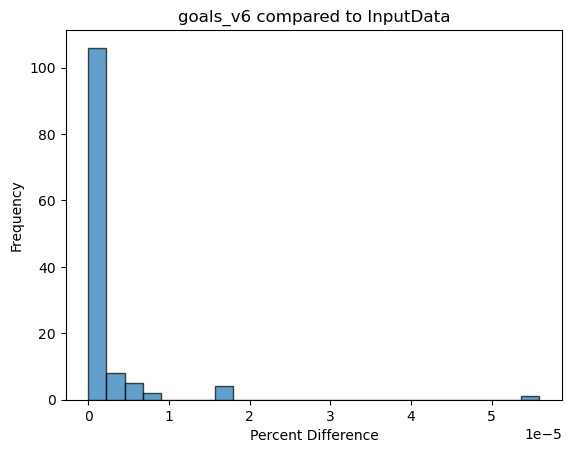

In [6]:
#print(meas_v1df['Log(M_HI)'])

logLir = df1['LOG(Lir)']
Lir = np.power(10, logLir) # Convert log Lir to Lir
dist = df1.Dl
SHI = df1['S(HI)']
SHIErr = df1.Err
velocity = df1.Vel

c = 299792.458 #km/s

z = velocity / c  # Convert velocity to redshift

percent_error = 0.1

M_h1old = (2.36e5/(1+z)**2) * SHI * dist**2

logM = np.log10(M_h1old)  # Convert M_h1 to log scale

M_hIv6 = ((2.36e5/(1+(v6df['20centerVel'] / c))**2) * v6df['line[Jykm/s]'] * v6df['Dlum[Mpc]']**2) \

logM_v6 = np.log10(M_hIv6)  # Convert M_hI to log scale

diff = np.abs((logM-logM_v6)/logM_v6)  # Calculate the relative difference

# Sort by difference (ascending)
sorted_idx = np.argsort(diff.values)
sorted_name = df1['Name'].iloc[sorted_idx]
sorted_diff = diff.iloc[sorted_idx][::-1]
for name, d in zip(sorted_name, sorted_diff):
    print(f"{name}: {d:.6f}")

plt.hist(diff, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel('Percent Difference')
plt.ylabel('Frequency')
plt.title('goals_v6 compared to InputData')





In [7]:
# To skip only row 110 (the 111th row, since Python is 0-indexed)
# Skip rows from 110 onwards (i.e., keep only the first 110 rows)
dianadf = pd.read_csv(folder_path + 'Diana2010_table.csv', nrows=109)
#row 111 System,Mstar(MS),IR/UV,log(LIR),SOURCE,RA,Dec,VEL(km/s),EXP.TIME(sec),LINEFLUX(K*km/s)
dianaLineFlux = dianadf['Diana(K*km/s)'] * .569 # Convert Diana line flux to Jy km/s

dsrc = dianadf.SOURCE
dsrc = dsrc.str.strip()  # Remove leading/trailing whitespace


In [8]:
matchedDF = v6df.set_index('obsFName').reindex(dianadf['SOURCE']).reset_index()

In [9]:
percentDifference = np.abs((matchedDF['line[Jykm/s]'] - dianaLineFlux) / dianaLineFlux)

sorted_idx = np.argsort(percentDifference)[::-1]
for idx in sorted_idx:
    print(f"{matchedDF['SOURCE'].iloc[idx]}: {percentDifference.iloc[idx]:.2f}")

F01173+1405: inf
F01484+2220: 803.92
F03164+4119: nan
F19115-2124: 15.04
F16577+5900: 14.56
F15250+3608: 5.88
F16504+0228: 5.60
F12043-3140: 0.02
F23254+0830: 1.32
F05054+1718: 1.00
F13362+4831: 1.00
F22491-1808: 1.00
F10173+0828: 1.00
F10038-3338: 0.40
F14348-1447: 1.00
F12590+2934: 1.00
F01076-1707: 1.00
F01364-1042: 1.00
F16164-0746: 1.00
F19297-0406: 1.00
F01519+3640: 0.89
F04502-3304: 1.00
F08572+3915: 1.00
F13373+0105: 0.04
F08354+2555: 0.88
F11257+5850: 0.82
F21453-3511: 1.46
F16030+2040: 0.64
F04191-1855: 0.53
F13197-1627: 0.50
F23488+1949: 0.02
F09111-1007: 0.45
F23157-0441: 0.44
F03359+1523: 0.44
F09126+4432: 0.41
F02203+3158: 0.50
F18131+6820: 0.37
F17548+2401: 0.37
F09320+6134: 0.37
F00402-2349: 0.35
F23444+2911: 0.33
F02401-0013: 0.32
F15327+2340: 0.28
F17132+5313: 0.27
F15437+0234: 0.26
F01053-1746: 0.24
F06052+8027: 0.21
F11011+4107: 0.21
F14179+4927: 0.21
F14547+2449: 0.19
F22287-1917: 0.17
F00163-1039: 0.17
F23024+1916: 0.17
F02435+1253: 0.15
F05083+2441: 0.13
F15163+4

/home/scratch/gbosdd/conda/envs/student-rhel8/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


Text(0.5, 1.0, 'Diana2010 compared to goals_v6')

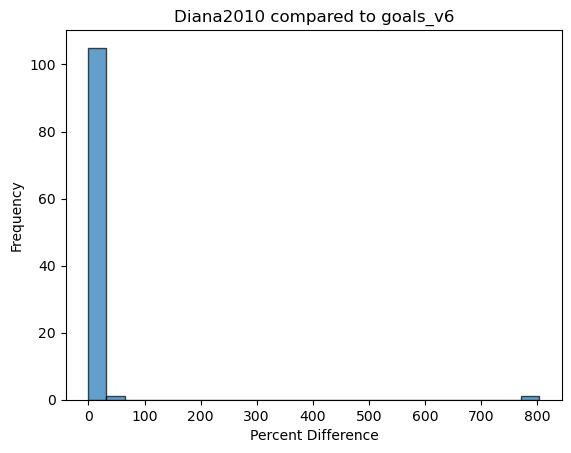

In [10]:
# Remove inf and NaN values before plotting
finite_percent_diff = percentDifference[np.isfinite(percentDifference)]

plt.hist(finite_percent_diff, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel('Percent Difference')
plt.ylabel('Frequency')
plt.title('Diana2010 compared to goals_v6')

In [11]:
exclude_codes = ['0', '3', '4', '5']
mask = (~v6df.fit.astype(str).str.contains('|'.join(exclude_codes), na=False)) & (v6df.w20 >= 0.0)

matchedDF = matchedDF[mask]
dianadf = dianadf[mask]

/tmp/ipykernel_357861/3654626078.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matchedDF = matchedDF[mask]
/tmp/ipykernel_357861/3654626078.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dianadf = dianadf[mask]


In [12]:
# logLir = df1['LOG(Lir)']
# Lir = np.power(10, logLir) # Convert log Lir to Lir
# dist = df1.Dl
# SHI = df1['S(HI)']
# SHIErr = df1.Err
# velocity = df1.Vel

c = 299792.458 #km/s

z = matchedDF['20centerVel'] / c  # Convert velocity to redshift

percent_error = 0.1

M_h1 = (2.36e5/(1+z)**2) * matchedDF['line[Jykm/s]'] * matchedDF['Dlum[Mpc]']**2

deltaV20 = matchedDF.w20
Mdyn = 40 * deltaV20**4

In [13]:
stellarMass = dianadf['Mstar(MS)'] 

Text(0, 0.5, '$M_{HI}$ [M$_\\odot$]')

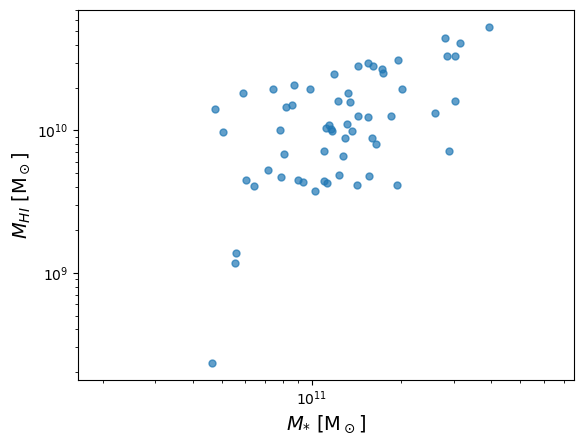

In [14]:
plt.loglog(stellarMass, M_h1, marker='o', linestyle='None', markersize=5, alpha=0.7)
plt.xlabel(r'$M_{*}$ [M$_\odot$]', fontsize=14)
plt.ylabel(r'$M_{HI}$ [M$_\odot$]', fontsize=14)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00503754
 0.02099298 0.02119362 0.02474644 0.02483416 0.02902562 0.03088687
 0.03665327 0.03804395 0.03945744 0.04007175 0.04315708 0.04547153
 0.0463536  0.04868626 0.04987439 0.05099457 0.05171388 0.0531713
 0.05521318 0.05534084 0.05717897 0.05827463 0.05909569 0.06319906
 0.06539068 0.06823794 0.06858338 0.07177144 0.07440433 0.0746819
 0.07494829 0.08018276 0.0843055  0.08447323 0.0852454  0.08762983
 0.08871077 0.09309257 0.09644283 0.09740766 0.10186631 0.10995109
 0.11237992 0.11703729 0.11821946 0.12901742 0.13004626 0.13041395
 0.13659545 0.13953012 0.14597991 0.15713024 0.15887212 0.16123655
 0.17615506 0.17659495 0.17725609 0.19092707 0.19227909 0.19759837
 0.19938034 0.20936817 0.23922461 0.26527458 0.29509847 0.31071508
 0.32805877        nan]


/home/scratch/gbosdd/conda/envs/student-rhel8/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/scratch/gbosdd/conda/envs/student-rhel8/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, '$M_{HI}/M_{*}$')

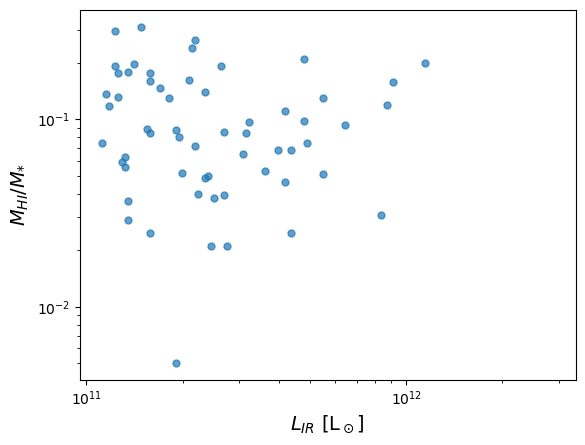

In [15]:
logMS = np.log10(stellarMass)
logMH1 = np.log10(M_h1)

check = np.abs(M_h1 / stellarMass)
print(np.abs(np.sort(check)))

plt.loglog( np.power(10,matchedDF['log(Lir)']), M_h1/stellarMass,marker='o', linestyle='None', markersize=5, alpha=0.7)
plt.xlabel(r'$L_{IR}$ [L$_\odot$]', fontsize=14)
plt.ylabel(r'$M_{HI}/M_{*}$', fontsize=14)

/home/scratch/gbosdd/conda/envs/student-rhel8/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


[ nan  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf 6.43 3.82
 2.42 1.95 1.47 1.25 1.06 0.88 0.8  0.58 0.45 0.41 0.33 0.32 0.29 0.26
 0.25 0.25 0.25 0.24 0.22 0.21 0.21 0.21 0.2  0.2  0.19 0.18 0.17 0.17
 0.15 0.13 0.13 0.12 0.1  0.1  0.1  0.09 0.09 0.09 0.08 0.08 0.07 0.07
 0.07 0.07 0.06 0.06 0.06 0.05 0.05 0.05 0.05 0.05 0.05 0.04 0.04 0.04
 0.04 0.03 0.03 0.03 0.03 0.02 0.02 0.02 0.01 0.01]


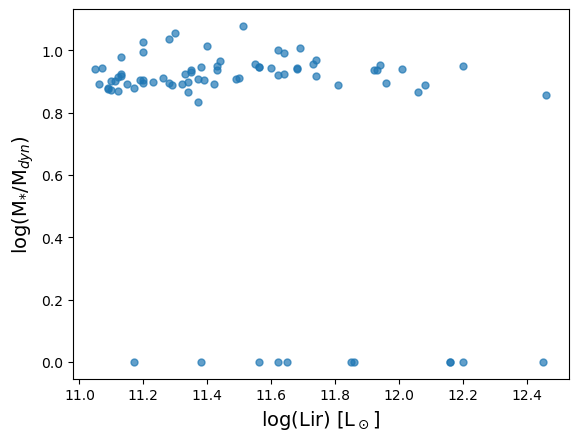

In [16]:
plt.plot( matchedDF['log(Lir)'], logMS/np.log10(Mdyn[mask]),marker='o', linestyle='None', markersize=5, alpha=0.7)
plt.xlabel(r'log(Lir) [L$_\odot$]', fontsize=14)
plt.ylabel(r'log(M$_{*}$/M$_{dyn}$)', fontsize=14)



ratio = np.abs(stellarMass/Mdyn[mask])

ratio = np.round(np.sort(ratio)[::-1], 2)  # Sort in descending order
print(ratio)